In [1]:
# Model Development
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('automobileEDA.csv', header=0)
# header=0 specifies that the first row of the CSV file should be treated as 
# the header row, which contains the column names.

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
# Theory of Linear Regression and Multiple Linear Regression
# Simple Linear Regression
# Simple Linear Regression is a method to help us understand the relationship between two variables:

# The predictor/independent variable (X)
# The response/dependent variable (that we want to predict)(Y)
# The result of Linear Regression is a linear function that predicts the response (dependent) 
# variable as a function of the predictor (independent) variable.


In [5]:
# Loading the modules for linear regression
from sklearn.linear_model import LinearRegression

In [6]:
# Creating linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [7]:
# using 'highway-mpg' to predict the price of the car using linear model 
X = df[['highway-mpg']]
Y = df[['price']]


In [8]:
# fitting the linear model using highway-mpg 
lm.fit(X,Y)

LinearRegression()

In [9]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [10]:
# finding the value of intercept(a)
lm.intercept_

array([38423.30585816])

In [11]:
# finding the value of slope(b)
lm.coef_

array([[-821.73337832]])

In [12]:
# creating a linear regression object called lm1
lm1 = LinearRegression()
lm1

LinearRegression()

In [13]:
# Traning the model using engine-size as the independent variable and price as dependent variable
X = df[['engine-size']]
Y = df[['price']]
lm1.fit(X,Y)


LinearRegression()

In [14]:
# finding the slope and intercept of the model
lm1.coef_

array([[166.86001569]])

In [15]:
lm1.intercept_

array([-7963.33890628])

In [16]:
# finding the equation of the predicted line 
# using X and Y  
Yhat=-7963.34 + 166.86*X

In [17]:
# using price as the dependent variable and engine size as the independent variable 
Price=-7963.34 + 166.86*df['engine-size']

In [18]:
# Multiple Linear Regression
# What if we want to predict car price using more than one variable?

# If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. 
# Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain 
# the relationship between one continuous response (dependent) variable and two or more predictor (independent) 
# variables. Most of the real-world regression models involve multiple predictors.

In [19]:
# Developing a model using various variables as the predictor variables 
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]


In [20]:
# fitting the linear model using 4 variables
lm.fit(Z, df['price'])

LinearRegression()

In [21]:
lm.intercept_

-15806.62462632923

In [22]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [23]:
# here is the final estimated model we get 
# Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [24]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and 
# the predictor variable is "normalized-losses" and "highway-mpg".
lm2 = LinearRegression()
lm2

LinearRegression()

In [25]:
A = df [['normalized-losses', 'highway-mpg']]
lm2.fit(A, df['price'])

LinearRegression()

In [26]:
lm2.intercept_

38201.31327245727

In [27]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [28]:
# Model Evaluation Using Visualization
# Now that we've developed some models, how do we evaluate our models and choose the best one? 
# One way to do this is by using a visualization.

In [29]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 


# %matplotlib inline is a magic command for Jupyter Notebook or JupyterLab that enables the plotting 
# of figures directly in the notebook interface, instead of opening them in a separate window.

In [30]:
# Regression Plot 
# When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

# This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line 
# going through the data. This will give us a reasonable estimate of the relationship between the two variables, the 
# strength of the correlation, as well as the direction (positive or negative correlation).
# Let's visualize highway-mpg as potential predictor variable of price:


(0.0, 48158.73028876527)

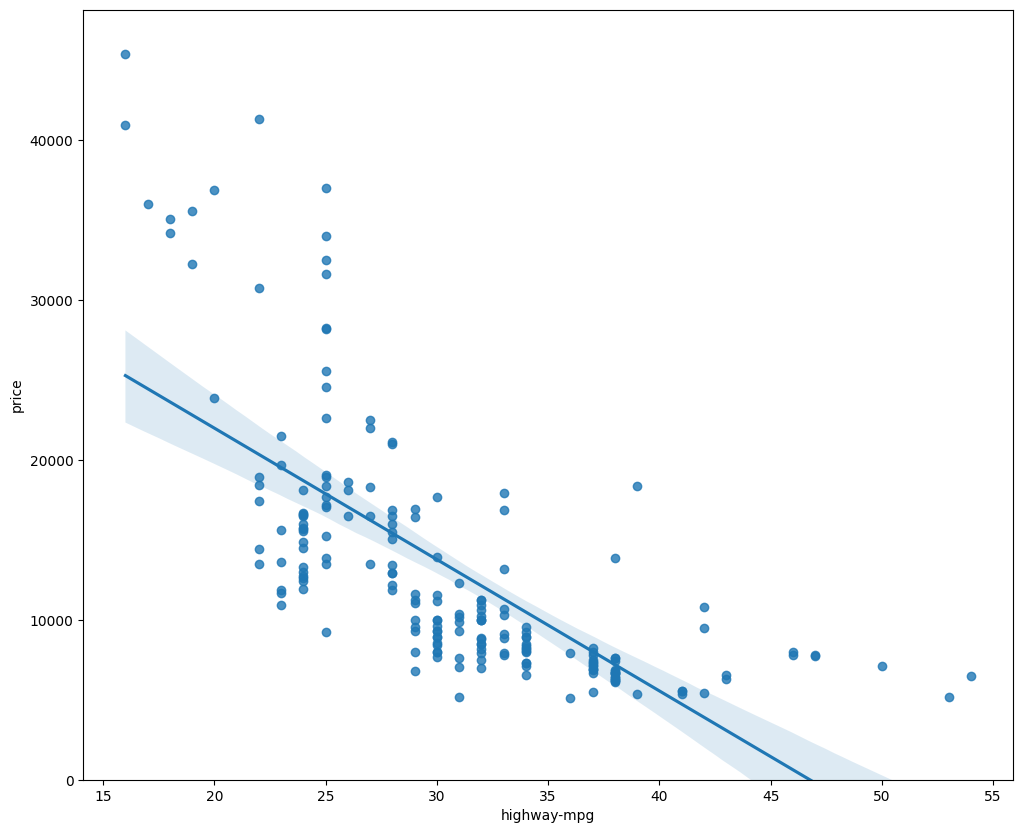

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [32]:
# We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

# One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data 
# points are around the regression line. This will give you a good indication of the variance of the data 
# and whether a linear model would be the best fit or not. If the data is too far off from the line, this 
# linear model might not be the best model for this data.

# Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

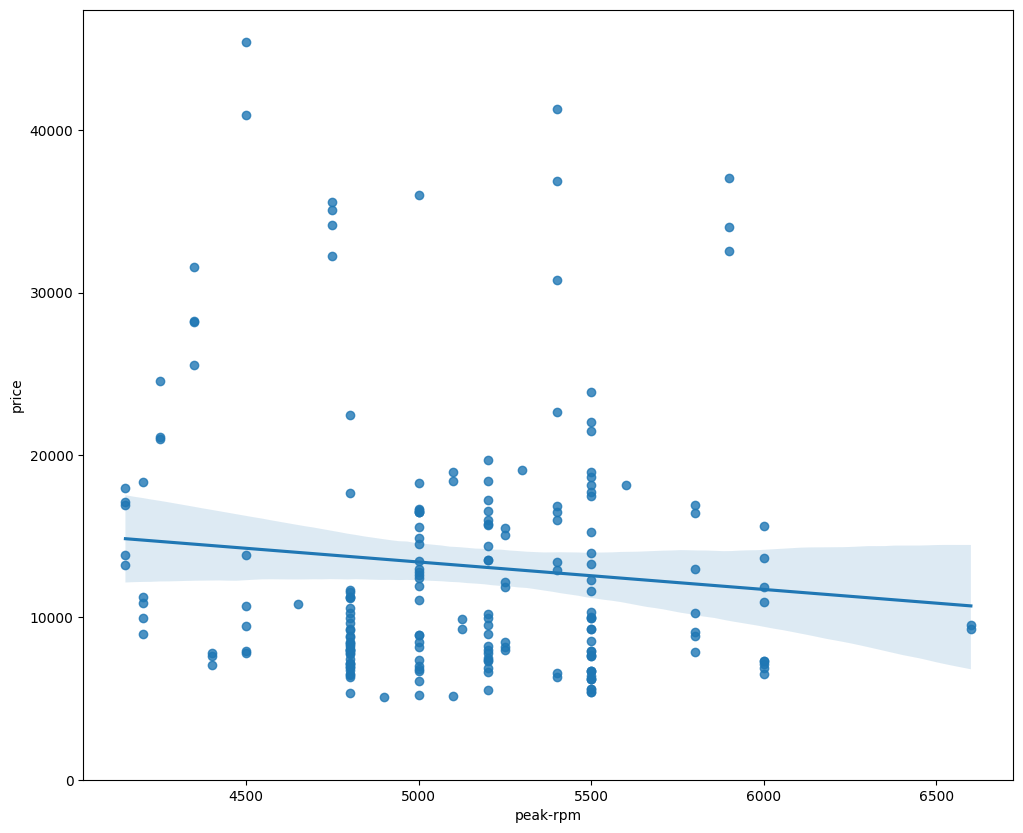

In [33]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [34]:
# Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated 
# with "price"? Use the method ".corr()" to verify your answer.
df[['peak-rpm', 'highway-mpg', 'price']].corr()



# The variable "highway-mpg" has a stronger correlation with "price", it is 
# approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [35]:
# Residual plot
# What is a residual?

# The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). 
# When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

# So what is a residual plot?

# A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable 
# on the horizontal x-axis.

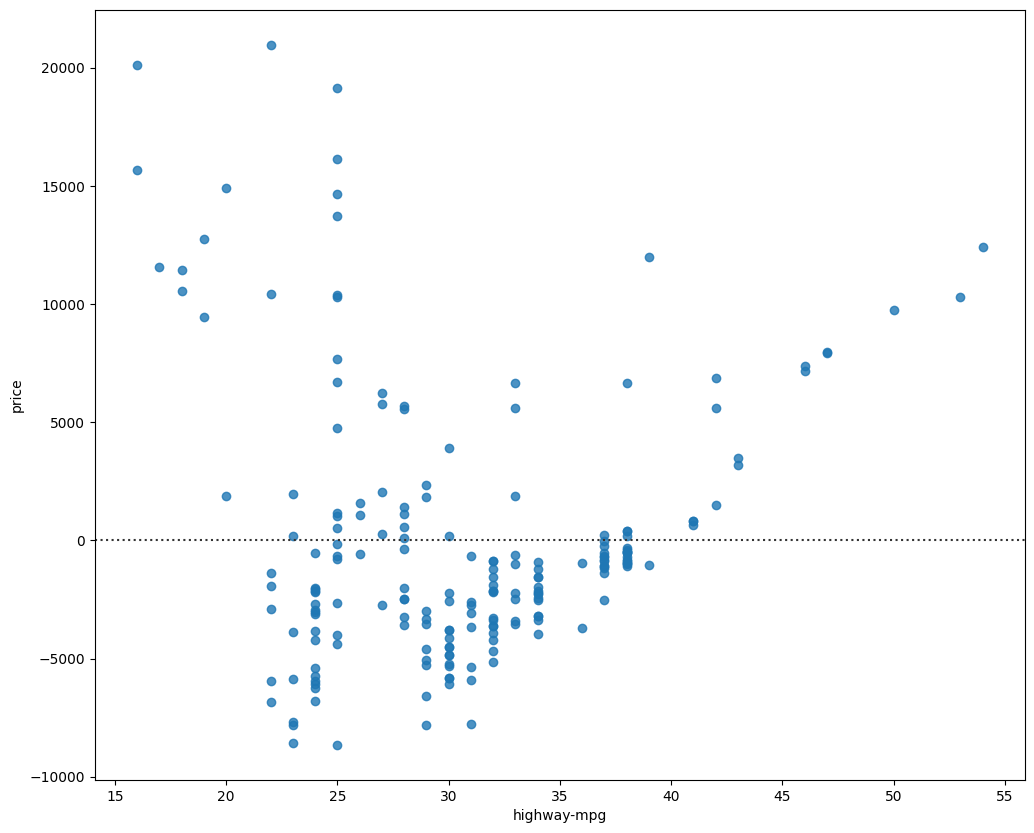

In [36]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x = df['highway-mpg'], y=df['price'])
plt.show()

In [37]:
# What is this plot telling us?

# We can see from this residual plot that the residuals are not randomly spread around the x-axis, 
# leading us to believe that maybe a non-linear model is more appropriate for this data.

In [38]:
# Visualizing Multiple Linear Regression
Y_hat = lm.predict(Z)

C:\Users\PC\AppData\Local\Temp\ipykernel_10100\4216146687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\PC\AppData\Local\Temp\ipykernel_10100\4216146687.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

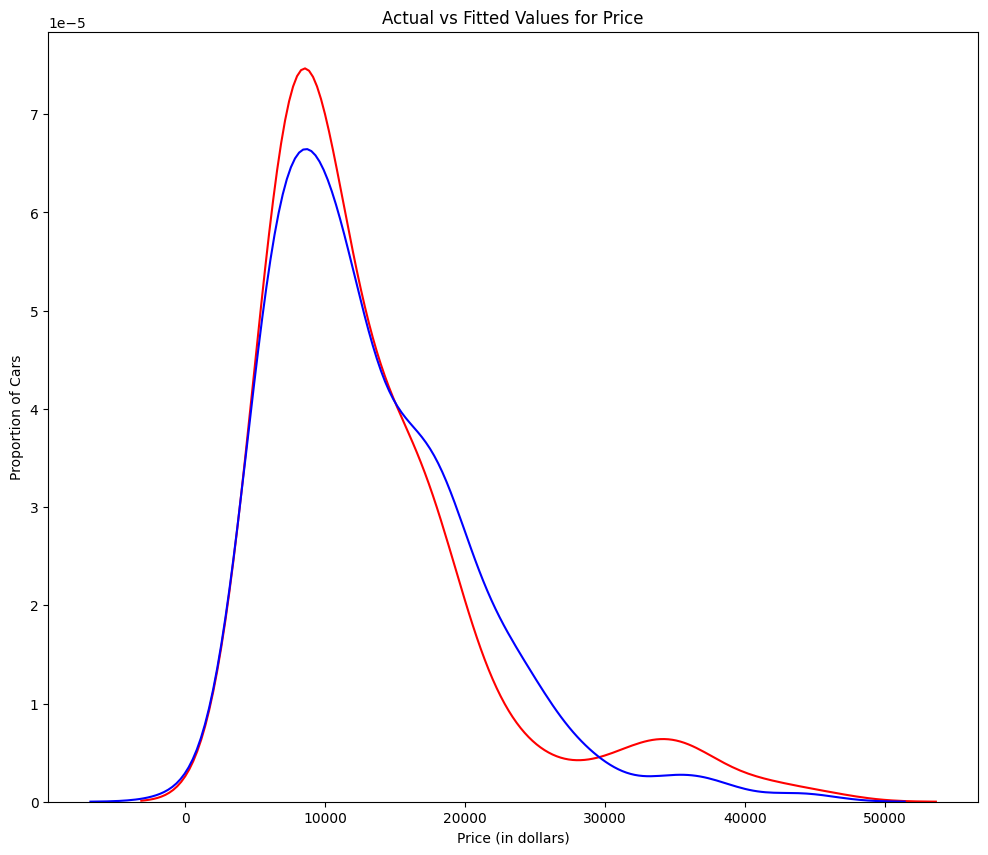

In [39]:
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


In [40]:
# We can see that the fitted values are reasonably close to the actual values since the two 
# distributions overlap a bit. However, there is definitely some room for improvement.

In [41]:
# Polynomial Regression and Pipelines
# Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

# We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.


In [42]:
# fitting the ploymonial data to the model 
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [43]:
x = df['highway-mpg']
y = df['price']

In [44]:
# fitting the polynomial using the function polyfit, the use the function poly1d to display the polynomial function
# Here we use a polynomial of the 3rd order(cubic)
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


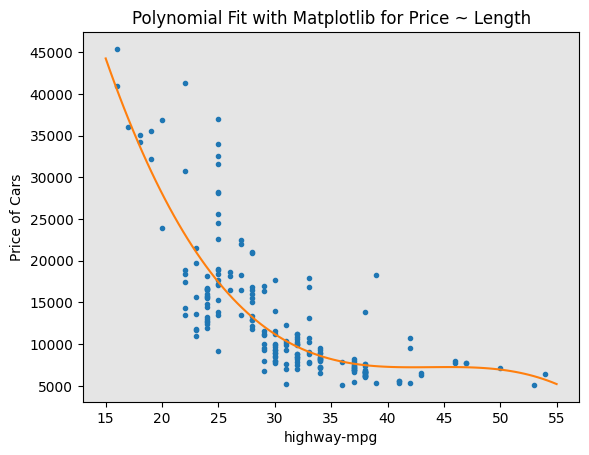

In [45]:
# plotting the function 
PlotPolly(p, x, y, 'highway-mpg')


In [46]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [47]:
# We can already see from plotting that this polynomial model performs better than the linear model. 
# This is because the generated polynomial function "hits" more of the data points.

In [48]:
# Creating 11 order polynomial model with the variables x and y from above.
# Here we use a polynomial of the 11rd order(cubic)
f1 = np.polyfit(x, y, 11)
p1 = np.polyfit(f1)
print(p1)
PlotPolly(p1, x, y, 'Highway MPG')

TypeError: polyfit() missing 2 required positional arguments: 'y' and 'deg'

In [49]:
# we can perform a polynomial transform on multiple featrues 
from sklearn.preprocessing import PolynomialFeatures

In [50]:
# now creating PolynomialFeatures object of degree 2:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [51]:
Z_pr = pr.fit_transform(Z)

In [52]:
# finding the total samples and features of the original data 
Z.shape

(201, 4)

In [53]:
# samples and features after performing the transformation 
Z_pr.shape 

(201, 15)

In [54]:
# INtroduction to pipeline 
# Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. 
# We also use StandardScaler as a step in our pipeline.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
# We create the pipeline by creating a list of tuples including the name of the model or estimator and 
# its corresponding constructor.
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [56]:
# inputting list as an argument to the Pipeline constructor 
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [57]:
# First, we convert the data type Z to type float to avoid conversion warnings that may 
# appear as a result of StandardScaler taking float inputs.

# Then, we can normalize the data, perform a transform and fit the model simultaneously.
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [58]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [59]:
# Creating a pipeline that standardizes the data, then produce a prediction using a linear regression 
# model using the features Z and target y.
Input = [('scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:10]


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [60]:
# Measures for In-Sample Evaluation
# R-squared

# R squared, also known as the coefficient of determination, is a measure to indicate how close 
# the data is to the fitted regression line. The value of the R-squared is the percentage of variation 
# of the response variable (y) that is explained by a linear model.


# Mean Squared Error (MSE)

# The Mean Squared Error measures the average of the squares of errors. That is, the difference 
# between actual value (y) and the estimated value (ŷ).
 


In [61]:
# Model 1: Simple Linear Regression
# calculating the R^2
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))


The R-square is:  0.7609686443622008


In [62]:
# We can say that ~76% of the variation of the price is explained by this simple linear model "highway_mpg_fit".

In [63]:
# Now calculating the MSE 
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

from sklearn.metrics import mean_squared_error


The output of the first four predicted value is:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]


In [64]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


In [65]:
# Model 2: Multiple Linear Regression
# using multiple LinearRegression calculating R^2
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [66]:
# We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [67]:
# now calculating the MSE 
Y_predict_multifit = lm.predict(Z)

In [68]:
# comparing the predicted result with the actual result 
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [69]:
# Polynomial Fit 
# calculating R^2
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print("The R-square value is:", r_squared)

The R-square value is: 0.6741946663906517


In [ ]:
# We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

In [70]:
# calculating the mse
mean_squared_error(df['price'], p(x))

20474146.42636122

In [71]:
# PREDICTION AND DECISION MAKING 
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [72]:
# creating a new input 
new_input = np.arange(1, 100, 1).reshape(-1, 1)


In [73]:
# fitting the model
lm.fit(X, Y)
lm

LinearRegression()

In [75]:
# Produce a prediction 
yhat = lm.predict(new_input)
yhat[0:5]

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

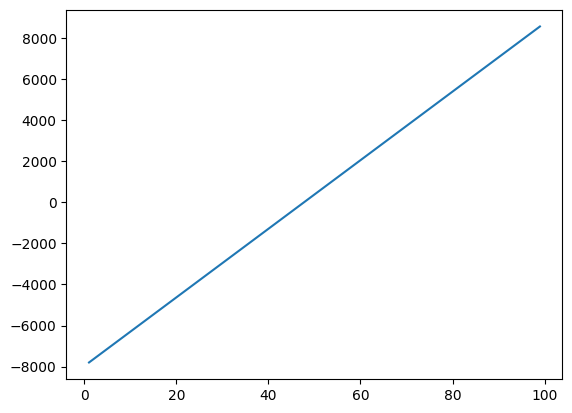

In [76]:
# we can plot the data 
plt.plot(new_input, yhat)
plt.show()